Librerias

In [3]:
%pip install pandas
%pip install matplotlib
%pip install statsmodels
%pip install numpy
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/11.0 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.0 MB 1.2 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.0 MB 1.2 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.0 MB 1.2 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/11.0 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.0 MB 1.2 MB/s

# Clase 1: Regresion Lineal

Configuracion Dataset

In [6]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values="?")
auto_mpg = auto_mpg.dropna() 
auto_mpg = auto_mpg.drop(columns=["cylinders", "model_year", "origin", "car_name"])
print(auto_mpg.head()) 

C:\Users\gonza\AppData\Local\Temp\ipykernel_4936\1919900989.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values="?")


    mpg  displacement  horsepower  weight  acceleration
0  18.0         307.0       130.0  3504.0          12.0
1  15.0         350.0       165.0  3693.0          11.5
2  18.0         318.0       150.0  3436.0          11.0
3  16.0         304.0       150.0  3433.0          12.0
4  17.0         302.0       140.0  3449.0          10.5


Regresion Lineal Simple

In [7]:
import statsmodels.api as sm

X = auto_mpg["displacement"].values.reshape(-1, 1)
y = auto_mpg["mpg"].values

x_train = X[:int(len(auto_mpg)*0.8)]
y_train = y[:int(len(auto_mpg)*0.8)]

x_test = X[int(len(auto_mpg)*0.8):]
y_test = y[int(len(auto_mpg)*0.8):]
X_train_sm = sm.add_constant(x_train)

# OLS: Ordinary Least Squares, es regresion lineal basicamente
model = sm.OLS(y_train, X_train_sm).fit()
y_pred = model.predict(sm.add_constant(x_test))
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     707.7
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           4.06e-82
Time:                        16:01:14   Log-Likelihood:                -853.28
No. Observations:                 313   AIC:                             1711.
Df Residuals:                     311   BIC:                             1718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.1838      0.459     70.165      0.0

Regresion Lineal Multiple

In [8]:
# Agarra todas las variables del dataset excepto el mpg que es la variable
# objetivo (y), y le agrega una constante
X = auto_mpg.drop(columns=["mpg"])
X = sm.add_constant(X)
y = auto_mpg["mpg"].values

x_train = X[:int(len(auto_mpg)*0.8)]
y_train = y[:int(len(auto_mpg)*0.8)]

x_test = X[:int(len(auto_mpg)*0.8)]
y_test = y[:int(len(auto_mpg)*0.8)]


model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     248.0
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           5.73e-95
Time:                        16:01:17   Log-Likelihood:                -813.59
No. Observations:                 313   AIC:                             1637.
Df Residuals:                     308   BIC:                             1656.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.5072      2.162     20.127   

# Clase 2 :Seleccion de variables independientes

FSS (Forward Stepwise Selection): Lo que hace el algoritmo FSS es ir agregando una variable a la vez, primero las que producen un mejor r^2 ajustado, hasta que al agregar un valor de r^2 adj da peor resultado que el anterior obtenido.

Igual el codigo de aca abajo no para de agregar variables, porque quiere obtener todos los resultados para despues poder hacer el grafico

In [9]:
import operator
X = auto_mpg.drop(columns=["mpg"])
X = sm.add_constant(X)

y = auto_mpg["mpg"].values

variables = ['const']
iterate_columns = X.columns.drop('const', 1)
r2_adj = []
vars_size = iterate_columns.size
var_model = {}
for k in range(0, vars_size):
  r2 = {}
  for var in iterate_columns:
    var_explicativa = X[variables + [var]]
    model = sm.OLS(y, var_explicativa)
    regr = model.fit()
    r2[var] = regr.rsquared_adj

  var_max_r2 = max(r2.items(), key=operator.itemgetter(1))[0]
  var_model[k] = var_max_r2
  r2_adj.append(r2[var_max_r2])
  print("R2 adj hasta ahora "+ str(r2_adj))
  iterate_columns = iterate_columns.drop(var_max_r2, 1)
  variables.append(var_max_r2)

R2 adj hasta ahora [0.691842306026063]
R2 adj hasta ahora [0.691842306026063, 0.7048656350343583]
R2 adj hasta ahora [0.691842306026063, 0.7048656350343583, 0.7046896611177529]
R2 adj hasta ahora [0.691842306026063, 0.7048656350343583, 0.7046896611177529, 0.7039525683453438]


BSS (Backward Stepwise Selection): Es como el FSS pero empieza agregando todas las variables al modelo al principio, y va eliminando una a una, cuando el r^2 ajustado empieza a decrecer, deja de eliminar.

In [10]:
variables = X.columns
iterate_columns = variables.drop('const', 1)
vars_size = iterate_columns.size
r2_adj = []
var_model = {}
for k in range(0, vars_size):
    r2 = {}
    i = 1
    for var in iterate_columns:
        variables = variables.drop(var, 1)
        var_explicativa = X[variables]
        variables = variables.insert(i, var)
        model = sm.OLS(y, var_explicativa)
        regr = model.fit()
        r2[var] = regr.rsquared_adj
        i += 1
    var_max_r2 = max(r2.items(), key=operator.itemgetter(1))[0]
    r2_adj.append(r2[var_max_r2])
    var_model[k] = var_max_r2
    iterate_columns = iterate_columns.drop(var_max_r2, 1)
    variables = variables.drop(var_max_r2, 1)

r2_max = r2_adj.index(max(r2_adj))

# Clase 3:  Regularizacion y Continuacion Regresion No Lineal

La Regularizacioon es una forma de complementar algoritmos de aprendizaje, como
la regresioon lineal o la regresion logiıstica, para evitar algunos problemas que surgen en
el modelamiento debido, usualmente, a la cantidad de parametros. En particular busca
resolver, o eliminar, el problema conocido como overfitting a traves de la eliminacion
automatica de algunos parametros que podrıan estar haciendo que el modelo sea demasiado
complejo. En este sentido, busca “simplificar” el modelo.

El overfitting, llamado a veces sobreajuste, es un problema muy importante en todos los
algoritmos de aprendizaje automatico. Consiste en tener una funcion de hipotesis hw(x)
que predice perfectamente, o casi perfectamente, el conjunto de entrenamiento, pero no
generaliza a nuevos datos.

Para reducir el overfitting de los datos de entrenamiento se desea obtener una funcion de
hipotesis mas simple, lo cual es equivalente a tener peque˜nos valores para los parametros
w1, w2, · · · , wn. La regularizacion es un metodo que permite de forma relativamente automatica
alcanzar este efecto: reduce los valores de cada parametro wi generando funciones
de hipotesis mas simples.

In [11]:
X = auto_mpg.drop(columns=["mpg"])

y = auto_mpg["mpg"].values

x_train = X[:int(len(auto_mpg)*0.8)]
y_train = y[:int(len(auto_mpg)*0.8)]

x_test = X[:int(len(auto_mpg)*0.8)]
y_test = y[:int(len(auto_mpg)*0.8)]

Regularizacion RIDGE

Penaliza los coeficientes de regresión grandes. En lugar de simplemente minimizar el error cuadrático 
(como en la regresión lineal simple), la regresión Ridge agrega un término de penalización a la función de costo.
λ es el termino de penalizacion.

λ>0: Se introduce una penalización que reduce la magnitud de los coeficientes. Esto ayuda a evitar 
que algunos coeficientes se vuelvan demasiado grandes y, por lo tanto, a mitigar el riesgo de sobreajuste.

Un valor alto de 𝜆
puede llevar a que todos los coeficientes se acerquen a cero, lo que puede resultar en un modelo demasiado simple.

Un valor bajo de λ 
tendrá un efecto menor en los coeficientes, lo que puede no ser suficiente para prevenir el sobreajuste.

In [12]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import r2_score
ridge = Ridge(alpha=1.0)

ridge.fit(x_train, y_train)

#displacement, horsepower, weight, acceleration
print("Coefficients:", ridge.coef_)

print("Beta 0:", ridge.intercept_)

y_pred = ridge.predict(x_test)

mse = np.mean((y_test - y_pred)**2)
print(f"mse: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"r2: {r2}")

Coefficients: [-0.00730442 -0.03428259 -0.00464061 -0.16000561]
Beta 0: 43.50402152613326
10.599043468524636
r2: 0.763095805332688


Regularizacion Lasso

Es muy parecida a la regularización Ridge,
Esta penalización permite a veces eliminar por completo una variable, ya que podría hacer que un coeficiente de cero, es más agresiva que ridge.

Esto sucede porque en ridge si vos pones un valor bajo de la variable, como está al cuadrado el error, 
te da muy chica la penalización entonces no te lo elimina por completo, en este caso como es el modulo, 
puede lograr eliminar una variable por completo.

In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)

print("Coefficients:", lasso.coef_)
print("Constant:", lasso.intercept_)

y_pred = lasso.predict(x_test)
mse = np.mean((y_test - y_pred)**2)
r2 = r2_score(y_test, y_pred)
print(f"r2: {r2}")

Coefficients: [-0.00564601 -0.01976286 -0.0051745  -0.        ]
Constant: 40.76203598874339
r2: 0.7614413433165821


Regresion NO lineal Logaritmica

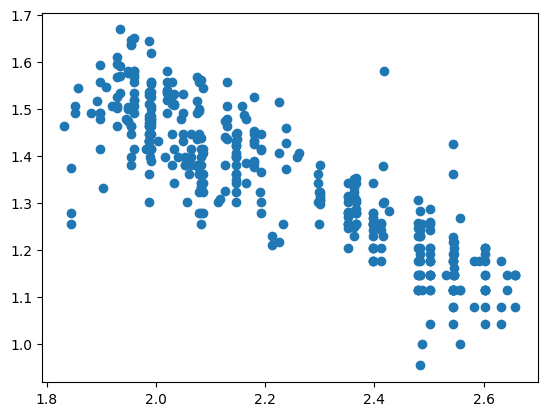

In [14]:
import matplotlib.pyplot as plt
X = auto_mpg['displacement']
y = auto_mpg["mpg"].values
x_log = np.log10(X)
y_log = np.log10(y)
plt.scatter(x_log, y_log)
plt.show()

In [15]:
x_train = x_log[:int(len(auto_mpg)*0.8)]
y_train = y_log[:int(len(auto_mpg)*0.8)]

x_test = x_log[:int(len(auto_mpg)*0.8)]
y_test = y_log[:int(len(auto_mpg)*0.8)]

x_log = sm.add_constant(x_log)
model = sm.OLS(y_log, x_log).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1109.
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          4.68e-116
Time:                        16:10:14   Log-Likelihood:                 457.91
No. Observations:                 392   AIC:                            -911.8
Df Residuals:                     390   BIC:                            -903.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5683      0.037     69.564   

C:\Users\gonza\AppData\Local\Temp\ipykernel_4936\2952935338.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_0 = model.params[0]
C:\Users\gonza\AppData\Local\Temp\ipykernel_4936\2952935338.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_1 = model.params[1]


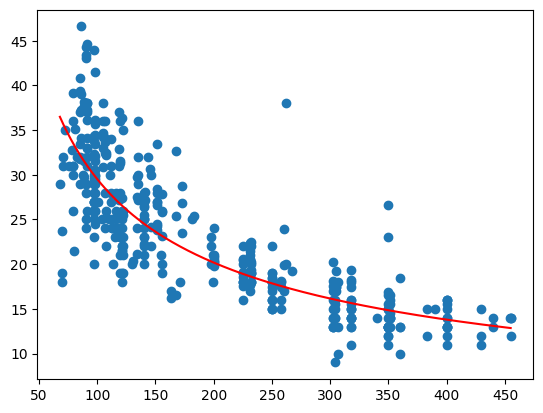

r2: 0.7397554555515125


In [17]:
beta_0 = model.params[0]
beta_1 = model.params[1]
a = np.power(10, beta_0)
x = np.arange(start=min(X), stop=max(X), step=0.1)
x = x[:,None]

y_model = a * np.power(x, beta_1)

plt.scatter(X, y)
plt.plot(x, y_model, 'r')
plt.show()
r2 = model.rsquared
print(f"r2: {r2}")